<a href="https://colab.research.google.com/github/najamsyed/notebooks/blob/master/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, read data using pandas dataframe:


In [35]:
my_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/OpticalData/DataMSI.csv",encoding='cp1252', delimiter=",")
my_data[1:5]

,Pixel-X,Pixel-Y,Longitude,Latitude,band_1,band_2,band_3,band_4,band_5,band_6,new_band_4
1,1172.5,1512.5,74.405669,36.676086,1.18615,1.18835,1.17130,1.07250,0.1708,0.17395,0
2,1173.5,1512.5,74.406004,36.676087,0.96035,0.96525,0.95555,0.88345,0.1848,0.18620,0
3,1174.5,1512.5,74.406340,36.676089,0.95915,0.96640,0.96995,0.91365,0.1955,0.20120,0
4,1175.5,1512.5,74.406676,36.676091,1.05320,1.04870,1.04475,0.95950,0.1753,0.18130,0


In [ ]:
my_data = my_data.iloc[:,[4,5,6,7,8,9,10]]
my_data[1:5]

,band_1,band_2,band_3,band_4,band_5,band_6,new_band_4
1,1.18615,1.18835,1.17130,1.07250,0.1708,0.17395,0
2,0.96035,0.96525,0.95555,0.88345,0.1848,0.18620,0
3,0.95915,0.96640,0.96995,0.91365,0.1955,0.20120,0
4,1.05320,1.04870,1.04475,0.95950,0.1753,0.18130,0


<div id="practice">
    <h3>Practice</h3>
    What is the size of data?
</div>


In [ ]:
my_data.shape

(452348, 7)

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


In [ ]:
#my_datafinal=my_data.loc[my_data["new_band_4"]]
my_datafinal=my_data.loc[my_data["new_band_4"]!=0]
cols = (["band_1", "band_2", "band_3","band_4", "band_5", "band_6", "new_band_4"])
my_datafinal.columns = cols
my_datafinal[1:5]

,band_1,band_2,band_3,band_4,band_5,band_6,new_band_4
19046,1.09940,1.11945,1.10115,0.94330,0.13415,0.13165,255
19047,1.10955,1.12545,1.10420,0.94200,0.13335,0.13130,255
19048,1.12320,1.13580,1.11865,0.95330,0.13185,0.13015,255
19049,1.08410,1.10230,1.08405,0.92775,0.13130,0.12985,255


In [ ]:
my_datafinal.shape

(12920, 7)

In [ ]:
my_datafinal.new_band_4.unique()

array([255, 127])

In [ ]:
my_datafinal.shape

(12920, 7)

In [ ]:
X=my_datafinal[['band_1','band_2','band_3','band_4','band_5','band_6']].values
X[0:5]

array([[1.1106 , 1.128  , 1.1055 , 0.9466 , 0.1331 , 0.13145],
       [1.0994 , 1.11945, 1.10115, 0.9433 , 0.13415, 0.13165],
       [1.10955, 1.12545, 1.1042 , 0.942  , 0.13335, 0.1313 ],
       [1.1232 , 1.1358 , 1.11865, 0.9533 , 0.13185, 0.13015],
       [1.0841 , 1.1023 , 1.08405, 0.92775, 0.1313 , 0.12985]])

In [ ]:
y=my_datafinal['new_band_4']
y[0:1]

19045    255
Name: new_band_4, dtype: int64

As you may figure out, some features in this dataset are categorical such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. **pandas.get_dummies()**
Convert categorical variable into dummy/indicator variables.


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y[0:3]


array([1, 1, 1])

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [ ]:
# Split the dataset into features and target
X = my_datafinal.iloc[:, :-1]
y = my_datafinal.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [ ]:
# Split the dataset into train and test sets
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match


In [ ]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of y training set {}'.format(y_trainset.shape))



Shape of X training set (9044, 6) &  Size of y training set (9044,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match

In [ ]:
print('Shape of X_Test set {}'.format(X_testset.shape),'&',' Size of y_testset set {}'.format(y_testset.shape))

Shape of X_Test set (3876, 6) &  Size of y_testset set (3876,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


Tu

In [ ]:
drugTree = RandomForestClassifier(n_estimators= 10,max_features=2, max_depth=1,random_state=42)
#drugTree = RandomForestClassifier()
drugTree # it shows the default parameters

RandomForestClassifier(max_depth=1, max_features=2, n_estimators=10,
                       random_state=42)

In [ ]:
drugTree.fit(X_trainset, y_trainset)

RandomForestClassifier(max_depth=1, max_features=2, n_estimators=10,
                       random_state=42)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [ ]:
drugTree.fit(X_trainset,y_trainset)

RandomForestClassifier(max_depth=1, max_features=2, n_estimators=10,
                       random_state=42)

In [ ]:
# Get feature importances from the trained model
importances = drugTree.feature_importances_

In [ ]:
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

In [ ]:
# Select the top 10 features
num_features = 6
top_indices = indices[:num_features]
top_importances = importances[top_indices]

In [ ]:
# Print the top 10 feature rankings
print("Top 10 feature rankings:")
for f in range(num_features):  # Use num_features instead of 10
    print(f"{f+1}. {X_trainset.columns[indices[f]]}: {importances[indices[f]]}")

Top 10 feature rankings:
1. band_6: 0.4
2. band_5: 0.4
3. band_2: 0.2
4. band_4: 0.0
5. band_3: 0.0
6. band_1: 0.0


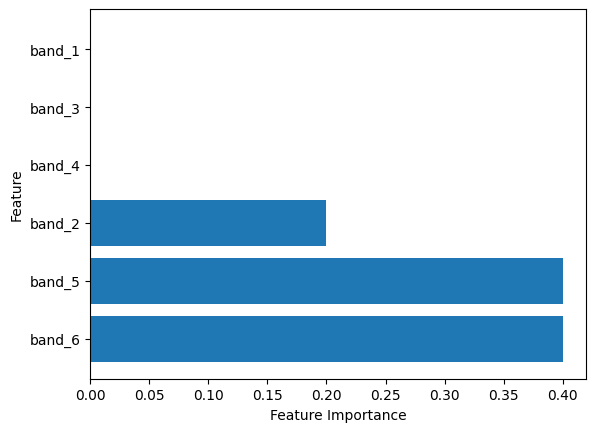

In [ ]:
# Plot the top 10 feature importances in a horizontal bar chart
plt.barh(range(num_features), top_importances, align="center")
plt.yticks(range(num_features), X_trainset.columns[top_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [ ]:
predTree = drugTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.


In [ ]:
print (predTree [0:13])
print (y_testset [0:13])


[127 255 127 127 127 127 127 127 127 127 127 127 127]
413035    127
329642    255
415473    127
411651    127
413469    127
282139    127
423224    127
416012    127
415127    127
450284    127
311802    127
412884    127
450216    127
Name: new_band_4, dtype: int64


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

Random Forest's Accuracy:  0.9896800825593395


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.
